## Importing the necessary libraries.

In [75]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer as imputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset.

In [59]:
df = pd.read_csv('./dataset/train.csv')

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.drop(['Id'], inplace = True, axis = 1)

In [62]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [63]:
df.shape

(1460, 80)

## Data cleaning.

### Finding some null values that aren't detected by Pandas.

In [64]:
null_values_dict = {
    "?": np.nan,
    "--": np.nan,
    "-": np.nan
}
df.replace(null_values_dict, inplace=True)

<AxesSubplot:>

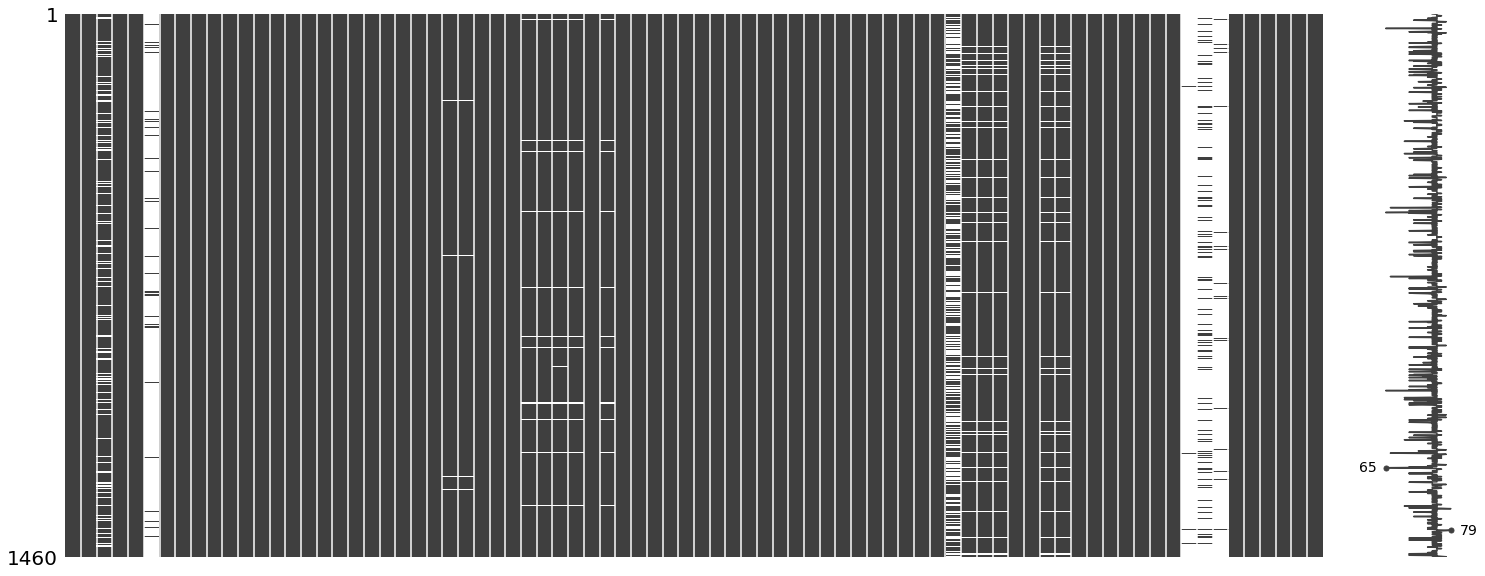

In [65]:
msno.matrix(df)

### Some columns have over 17% null values, so rather than filling so many null values, I opt to simply delete those columns.

In [66]:
print(f"Initial shape : {df.shape}")
for col in df:
    percentage_null = df[col].isnull().sum() * 100 / df.shape[0]
    # print(f"{percentage_null}%", col)
    if percentage_null > 17 : 
        df.drop(col, axis=1, inplace=True)
print(f"Shape after removing columns having excessive null values : {df.shape}")

Initial shape : (1460, 80)
Shape after removing columns having excessive null values : (1460, 74)


### Now check out the null value matrix...

<AxesSubplot:>

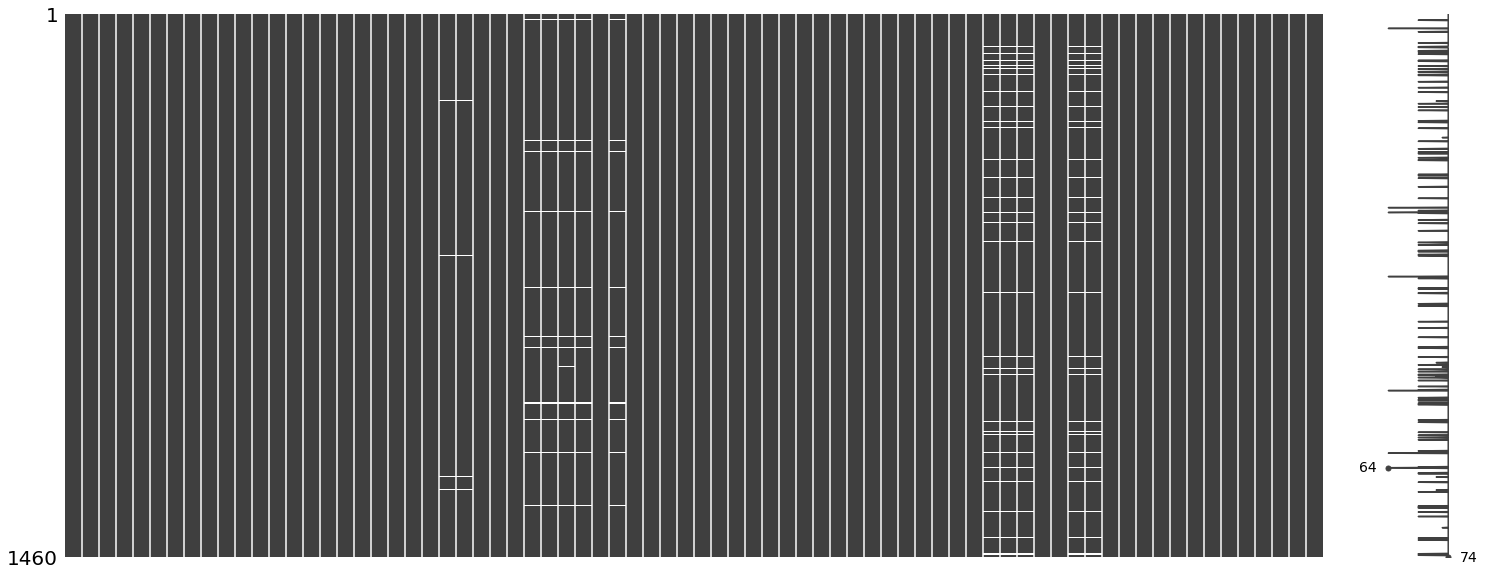

In [67]:
msno.matrix(df)

### I choose to deal with null values as follows:
### Categorical variables are replaced using mode, and numerical variables are replaced using median.

In [68]:
numerical_dtypes = ['int64', 'float64']
categorical_dtypes = ['object']

In [69]:
numerical_imputer = imputer(strategy='median', missing_values=np.nan)
categorical_imputer = imputer(strategy = 'most_frequent', missing_values=np.nan)

In [70]:
print(numerical_imputer)
print(categorical_imputer)

SimpleImputer(strategy='median')
SimpleImputer(strategy='most_frequent')


In [71]:
for col in df:
    if df[col].dtype in numerical_dtypes:
        temp_numerical_imputer = numerical_imputer.fit(df[[col]])
        df[[col]] = temp_numerical_imputer.transform(df[[col]])

    elif df[col].dtype in categorical_dtypes:
        temp_categorical_imputer = categorical_imputer.fit(df[[col]])
        df[[col]] = temp_categorical_imputer.transform(df[[col]])

<AxesSubplot:>

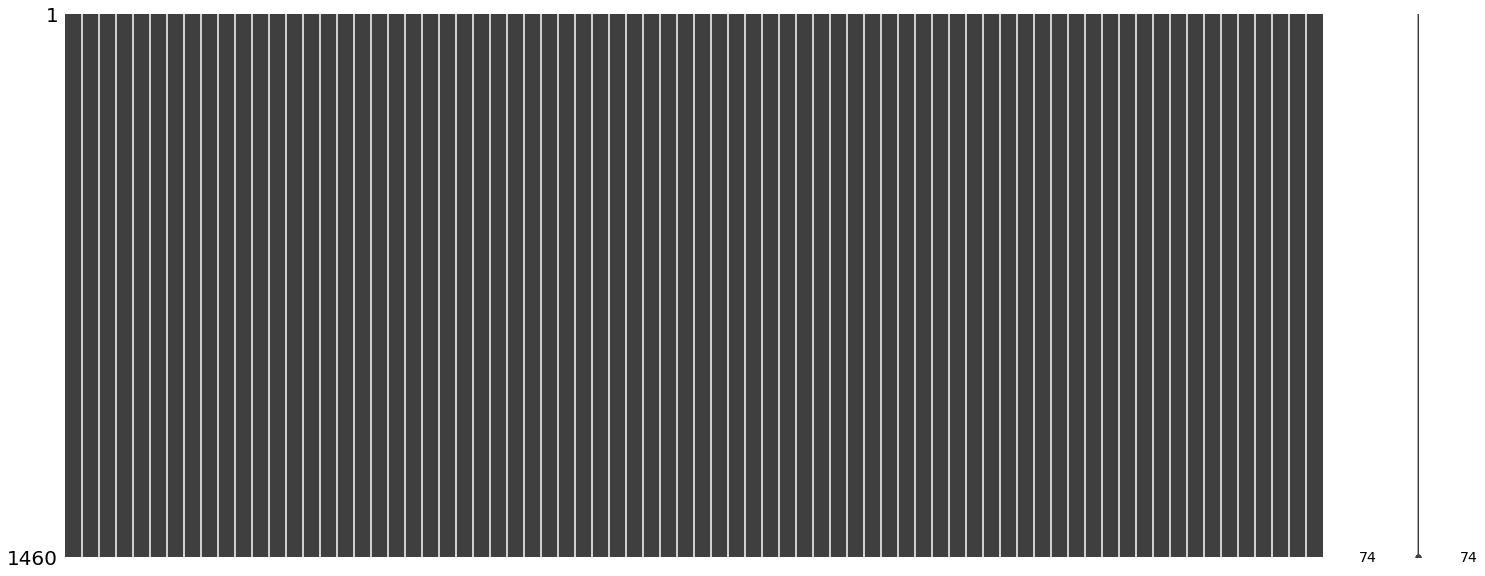

In [72]:
msno.matrix(df)

In [73]:
df.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0           60.0       RL   8450.0   Pave      Reg         Lvl    AllPub   
1           20.0       RL   9600.0   Pave      Reg         Lvl    AllPub   
2           60.0       RL  11250.0   Pave      IR1         Lvl    AllPub   
3           70.0       RL   9550.0   Pave      IR1         Lvl    AllPub   
4           60.0       RL  14260.0   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455        60.0       RL   7917.0   Pave      Reg         Lvl    AllPub   
1456        20.0       RL  13175.0   Pave      Reg         Lvl    AllPub   
1457        70.0       RL   9042.0   Pave      Reg         Lvl    AllPub   
1458        20.0       RL   9717.0   Pave      Reg         Lvl    AllPub   
1459        20.0       RL   9937.0   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPo

In [74]:
X = df.drop(['SalePrice'], axis=1) #Independent variable
y =  df['SalePrice']  #Dependent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Encoding of categorical columns (One-Hot Encoding)...

In [76]:
def one_hot_encoding(df, feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [77]:
for col in df:
    if df[col].dtype in categorical_dtypes:
        df = one_hot_encoding(df, col)

In [78]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


# Feature Selection

In [79]:
#Calculating VIFs for each feature.

X = df.drop(['SalePrice'], axis=1) #Independent variables
y =  df['SalePrice']  #Dependent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

d:\Projects\Data Science - Machine Learning\house-prices\house-prices-venv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   feature        VIF
0               MSSubClass  34.359914
1                  LotArea   3.258742
2              OverallQual   5.462713
3              OverallCond   2.638752
4                YearBuilt  14.793608
..                     ...        ...
264  SaleCondition_AdjLand        inf
265   SaleCondition_Alloca        inf
266   SaleCondition_Family        inf
267   SaleCondition_Normal        inf
268  SaleCondition_Partial        inf

[269 rows x 2 columns]


In [106]:
#If VIF > 5, then the column is eliminated due to excessive data multicollinearity.
for index, row in vif_data.iterrows():
    if row['VIF'] > 5:
        X = X.drop([row['feature']], axis=1)
print(X)

      LotArea  OverallCond  YearRemodAdd  MasVnrArea  BsmtFullBath  \
0      8450.0          5.0        2003.0       196.0           1.0   
1      9600.0          8.0        1976.0         0.0           0.0   
2     11250.0          5.0        2002.0       162.0           1.0   
3      9550.0          5.0        1970.0         0.0           1.0   
4     14260.0          5.0        2000.0       350.0           1.0   
...       ...          ...           ...         ...           ...   
1455   7917.0          5.0        2000.0         0.0           0.0   
1456  13175.0          6.0        1988.0       119.0           1.0   
1457   9042.0          9.0        2006.0         0.0           0.0   
1458   9717.0          6.0        1996.0         0.0           1.0   
1459   9937.0          6.0        1965.0         0.0           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0 

# Linear Regression